<a href="https://colab.research.google.com/github/gealvera/don-confiado/blob/Class-1/Clase_01_LLM_B%C3%A1sico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tribu IA les da la bienvenida al curso de Agentes Nivel Intermedio


![Descripción de la imagen](https://drive.google.com/uc?export=download&id=1LNMJ1zjBZkWJeZwJO38EJzfOWBHt4u4q)



El objetivo de esta primera clase es dejar claros los siguientes conceptos:
* Agentes de IA
* LLM Large Language Models
* Conversación
* Structured Output


Repositorio de Github

https://github.com/tribu-ia/don-confiado

Este mismo colab
https://colab.research.google.com/drive/1T15cJEjegMskuDccZoYTDbYWMiO2x1dA


**URL corta del Colab**: https://tinyurl.com/mptwxudm

**Clase grabada en Youtube**:  https://www.youtube.com/watch?v=CojhFqCFcMU



## Qué es un agente de IA

Un agente de IA es un sistema que percibe su entorno, razona y actúa para cumplir objetivos.

Para ser considerado un agente de IA debe cumplir con:

* **Percepción**: captar información del entorno.
* **Razonamiento**: procesar y decidir qué hacer.
* **Acción**: ejecutar decisiones que afecten el entorno.
* **Autonomía**: operar sin instrucciones paso a paso.
* **Objetivo**: orientarse a metas definidas.



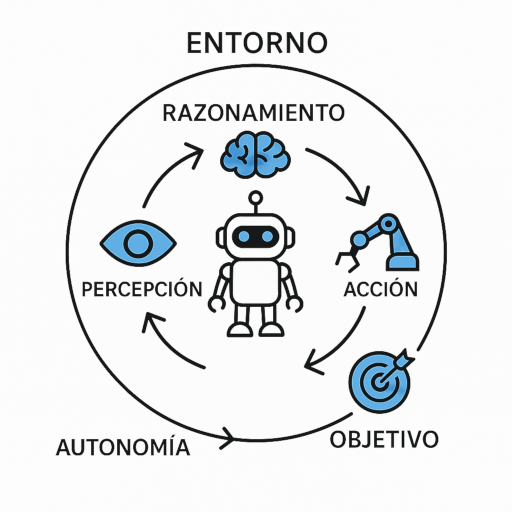

No vamos a entrar en las discusiones filosóficas de si una automatización que usa IA es un agente. En este curso entenderemos como hacer ambas cosas.


## Qué es un LLM?


Un LLM (Large Language Model) es un modelo de inteligencia artificial entrenado con enormes cantidades de texto para comprender y generar lenguaje natural de manera coherente. Estos modelos pueden responder preguntas, redactar textos, traducir, resumir y realizar tareas que imitan la comunicación humana.




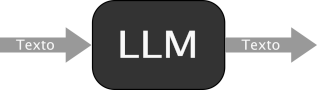


*Los LLM realmente tienen más funcionalidades pero para este primer ejemplo este diagrama ilustra lo que hacen.  ESTE DIAGRAMA ES UNA BURDA SIMPLIFICACIÓN DE LAS CAPACIDADES DE LOS LLM. Irá cambiando con el avance del curso*

El más famoso actualmente es GPT (ustedes lo conocen como ChatGPT) y hay muchísimos otros más como:

* **GPT** - OpenAI
* **Gemini** (antes Bard) - Google DeepMind
* **Claude**  - Anthropic
* **LLaMA**  - Meta (Facebook)
* **Mistral**  - Mistral AI
* **Grok** - xAI (empresa de Elon Musk) Politicamente incorrecto
* **Gemma** - Google (open-source lightweight models)

Estos modelos pueden ser usados utilizando APIs proveidos directamente por sus creadores.


## Para qué sirven los LLM (por el momento los de solo texto)

* Generar texto: Hazme una carta, generame un contrato, un poema
* Sabelotodo: Cuál es la capital de Francia?
* Traducción
* Resumir o engrandecer
* Corrección de texto, estilo
* Programación
* Clasificar
* Análisis y Extracción de información
* Matemáticas
* Piensa?
* Planea?
* Razonamiento Lento

Y sobretodo para Parafrasear **MODO PERICO**



##TOKENS

Los LLM reciben el texto y es partido en tokens. Esto es mejor verlo en este enlace.

[Tokenizador](https://platform.openai.com/tokenizer)


##PRECIOS


Algunos modelos se pueden correr en tu máquina, pero los mejores son de pago. Y se cobra por token

[Precios Open AI](https://openai.com/es-419/api/pricing/)

[Precios Gemini](https://ai.google.dev/gemini-api/docs/pricing?hl=es-419)

**No más cháchara. Empecemos!**

Lo primero será instalar las dependencias necesarias por cada API



In [ ]:
print("Instalando dotenv")
!pip install --quiet python-dotenv

print("Instalando openai")
!pip install --quiet openai

print("Instalando genai")
!pip install --quiet google-genai

print("Instalando ollama")
!pip install --quiet ollama
print("Paso finalizado")





Ahora vamos a poner las llaves o (API_KEYS) de cada plataforma


Recuerden crear los API KEYS de Google Gemini y OpenAI

Google Gemini:  https://aistudio.google.com/api-keys
OpenAI: https://platform.openai.com/api-keys




from google import genai
from openai import OpenAI
import os

llm_input_text = """Sólo traduce el siguiente texto desde el inglés  al español:

The future is both dark and bright,
Some lose their jobs, while others rise in might.
I do not know if I should laugh or cry,
So I will learn, and let knowledge fly.
A light for myself, for my people as well,
Through study and hope, our stories we’ll tell.

"""

# Inicializar el cliente con la API KEY
gemini_client = genai.Client(api_key=gemini_api_key)
openai_client = OpenAI(api_key=openai_api_key)


# Solicitud a Gemini
gemini_resp = gemini_client.models.generate_content(
    model="gemini-2.5-flash",
    contents=llm_input_text
)


# Solicitud a OpenAI usando chat completions
messages = [{"role": "user", "content": llm_input_text}]

openai_resp = openai_client.chat.completions.create(
    model="gpt-5-mini",  # Ejemplo de modelo reciente disponible
    messages=messages
)

print("------------------RESPUESTA GEMINI---------------")
print(gemini_resp.candidates[0].content.parts[0].text)

print("------------------RESPUESTA OPENAI---------------")
print(openai_resp.choices[0].message.content)



In [ ]:
print("------------------GEMINI RESPONSE ---------------")
display(gemini_resp)

print("------------------OPENAI RESPONSE ---------------")
display(openai_resp)

## Introducimos Langchain

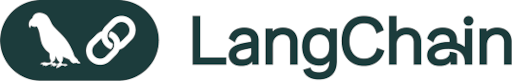


Se puede hacer lo mismo con LANGCHAIN.  Se usa langchain porque cada proveedor de LLM tiene sus propios APIs y langchain nos agrega una capa de estadarización que nos pemitirá usar cualquier LLM con poco o ningún cambio.



In [ ]:
!pip install --quiet langchain
!pip install --quiet langchain_google_genai
!pip install --quiet langchain_openai
print("Langchain instalado")


In [ ]:
from langchain.chat_models import init_chat_model
from langchain_core.messages import HumanMessage, SystemMessage , AIMessage


openai_model = init_chat_model("gpt-4o-mini",      model_provider="openai",        api_key=openai_api_key)
gemini_model = init_chat_model("gemini-2.5-flash", model_provider="google_genai",  api_key=gemini_api_key)

messages = [
    HumanMessage(content=llm_input_text),
]

openai_model_response = openai_model.invoke(messages)
gemini_model_response = gemini_model.invoke(messages)

print("------------------OPENAI RESPONSE ---------------")
print(openai_model_response.content)
print("-----------------------------------------------")
display(openai_model_response)

print("------------------GEMINI RESPONSE ---------------")
print(gemini_model_response.content)
print("-----------------------------------------------")
display(gemini_model_response)



## LLM Conversación

Lo visto anteriormente fue una simplificación basada en las primeras versiones de los LLM.


Los LLM están diseñados para manejar una conversación comunmente intercalada entre mensajes del "humano" y mensajes de la Inteligencia Artificial.

Y coloco entre comillas mensajes del "humano" porque esos mensajes del humano pueden ser mensajes de otra IA, mensajes generados por programas o código y esto a la larga es lo que termina siendo uno de los elementos clave en la creación de un agente.

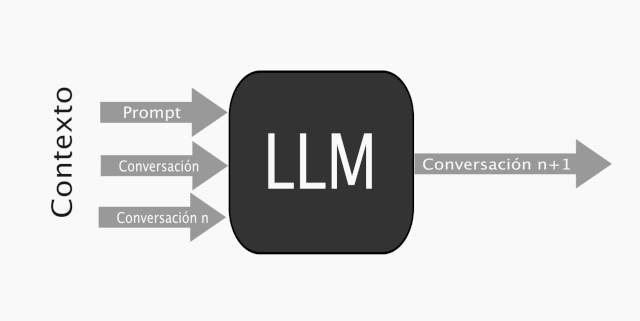


#Ventana de Contexto






In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage , AIMessage



messages = [
    SystemMessage(content="""Eres Brayan David, un asistente de la Tienda Don Confiado.
    Don Confiado es una tienda de abarrotes en la ciudad de Envigado, Colombia.
    Tienes muchos productos de comida chatarra de productores como Frito Lay, productos Postobón
     Responderás todas las preguntas que te haga tu jefe. """),

    HumanMessage(content="Buenos días. Como te llamas?"),
    AIMessage(content="'¡Buenos días, jefe! Mi nombre es Brayan David, y soy el asistente aquí en la Tienda Don Confiado. ¿En qué puedo ayudarle hoy?"),
    HumanMessage(content="Que productos tienes?"),
    AIMessage(content="Tenemos Frito Lay y productos Postobón"),



    HumanMessage(content="Tienes Manzana Postobón")
]

response = gemini_model.invoke( messages)

print(response.content)

# Los LLM no tienen memoria


Como se puede ver en el ejercio anterior. El LLM siempre necesita recibir toda la conversación en cada llamado.

Eso hace que al avanzar la conversación el consumo de tokens vaya aumentando por cada llamado.

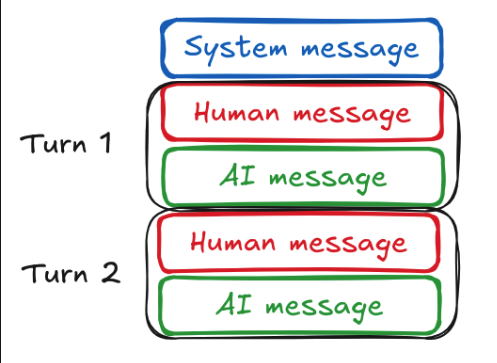

### Turno 1

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

memory_messages = [
    SystemMessage(content="""Eres Brayan David, un asistente de la Tienda Don Confiado.
    Don Confiado es una tienda de abarrotes en la ciudad de Envigado, Colombia.
    Tienes muchos productos de comida chatarra de productores como Frito Lay, productos Postobón.
    Responderás todas las preguntas que te haga tu jefe.""")
]

def add_message(role: str, content: str):
    if role == "human":
        memory_messages.append(HumanMessage(content=content))
    elif role == "ai":
        memory_messages.append(AIMessage(content=content))
    elif role == "system":
        memory_messages.append(SystemMessage(content=content))
    else:
        raise ValueError("Rol no válido: usa 'human', 'ai' o 'system'")

add_message("human", "Buenos días. Cómo te llamas?")
response1 = gemini_model.invoke(memory_messages)

print(f'respuesta del modelo en el primer turno {response1.content}\n')
add_message("ai", response1.content)


for message in memory_messages:
    print(message)


### Turno 2

In [ ]:
add_message("human", "Qué productos tienes?")
response2 = gemini_model.invoke(memory_messages)
print(f'respuesta del modelo en el segundo turno {response2.content}\n')
add_message("ai", response2.content)

print(memory_messages)

### Turno 3

In [ ]:
add_message("human", "Mi nombre es Andres y quiero comprar una gaseosa postobon, tienen?")
response3 = gemini_model.invoke(memory_messages)
print(f'respuesta del modelo en el tercer turno {response3.content}\n')
add_message("ai", response3.content)


for message in memory_messages:
    print(message)

### Turno 4

In [ ]:
add_message("human", "Como es mi nombre?")
response4 = gemini_model.invoke(memory_messages)
print(f'respuesta del modelo en el cuarto turno {response4.content}\n')
add_message("ai", response4.content)

print(f'array de memoria{memory_messages}')

for message in memory_messages:
    print(message)

# Structured Output


Unas de las características que tienen los LLM es que nos permiten solicitarles tareas puntuales.

Y el resultado de esa tarea podemos pedirlo en un JSON. El problema es que los LLM suelen ser bastante licharacheros y además de responder con un JSON expliquen como lo hicieron y se ofrezcan a hacerlo de maneras diferentes.

Para forzar a que un LLM responda como queremos existen los structured output.

Se le pide al LLM que el resultado sea un JSON y se fuerza a que el resultado respete un formato en particular: un json schema.

In [ ]:
resp = gemini_model.invoke("""Analiza el siguiente texto y clasifica la intención del usuario entre (create_provider, create_product, none, bye):

Quiero crear el proveedor Papitas Rica con NIT 800900100""")

print(resp.content)

resp = gemini_model.invoke("""Analiza el siguiente texto y clasifica la intención del usuario entre (create_provider, create_product, none, bye):

Hola como te llamas""")

print(resp.content)


resp = gemini_model.invoke("""Analiza el siguiente texto y clasifica la intención del usuario entre (create_provider, create_product, none, bye):

hasta la vista baby""")

print(resp.content)



Como se puden dar cuenta el modelo responde pero es súper salamero y adornará la respuesta con texto que no se requiere.

In [ ]:


from pydantic import BaseModel
from typing import Literal


# Define the schema correctly
# Define schema in JSON Schema style, with detailed descriptions for the LLM
intention_schema = {
    "title": "UserIntention",
    "description": (
        "Schema to classify the user's request into a high-level intention. "
        "The model must always return one of the allowed intention labels. "
        "If the intention is 'create_provider' or 'create_product', the model "
        "must also decide whether the user already provided enough data to actually "
        "create the entity (intentiondataincluded = true) or not (false). "
        "If the user is just chatting, set intention to 'none'. "
        "If the user is ending the conversation, set intention to 'bye'."
    ),
    "type": "object",
    "properties": {
        "userintention": {
            "type": "string",
            "enum": ["create_provider", "create_product", "none", "bye"],
            "description": (
                "Main classification of the user's intention. "
                "- 'create_provider': user wants to create a provider. "
                "- 'create_product': user wants to create a product. "
                "- 'none': casual conversation or unrelated message. "
                "- 'bye': user is ending the conversation."
            )
        },
        "intentiondataincluded": {
            "type": "boolean",
            "description": (
                "When the intention is 'create_provider' or 'create_product', "
                "this flag indicates whether the user already provided specific data "
                "such as names, identifiers, or attributes required for creation. "
                "True = data is included, False = data is missing. "
                "If intention is 'none' or 'bye', this field can be omitted."
            )
        }
    },
    "required": ["userintention"]
}

# Bind schema to model
model_with_structure = gemini_model.with_structured_output(intention_schema)

# Invoke the model
structured_output = model_with_structure.invoke( "Quiero crear el proveedor Papitas Rica con NIT 800900100")
print(structured_output)

# Invoke the model
structured_output = model_with_structure.invoke( "Quiero crear un proveedor")
print(structured_output)

# Invoke the model
structured_output = model_with_structure.invoke( "Hola como te llamas")
print(structured_output)


structured_output = model_with_structure.invoke( "hasta la vista baby")
print(structured_output)



In [ ]:
texto = """Factura de Venta: v-102223.

Nit : 800.900.000
Razon Social: Papa el porvenir

2025-09-01

Esta es una factura de venta y se asemeja a una nota débito
"""

json_schema = {
  "$schema": "https://json-schema.org/draft/2020-12/schema",
  "title": "FacturaColombiana",
  "type": "object",
  "properties": {
    "numeroFactura": {
      "type": "string",
      "description": "Número consecutivo de la factura (autorizado por la DIAN)"
    },
    "fechaEmision": {
      "type": "string",
      "format": "date",
      "description": "Fecha de emisión de la factura"
    },
    "moneda": {
      "type": "string",
      "description": "Moneda utilizada en la factura (ej. COP, USD)",
      "default": "COP"
    },
    "emisor": {
      "type": "object",
      "description": "Información del emisor de la factura",
      "properties": {
        "razonSocial": { "type": "string" },
        "nit": { "type": "string" }
      },
      "required": ["razonSocial", "nit"]
    }
  },
  "required": ["numeroFactura", "fechaEmision", "emisor"]
}

# ✅ Usa el schema correcto
model_with_structure = gemini_model.with_structured_output(json_schema)

resp = model_with_structure.invoke(texto)
print(resp)



intention_json = {"user_intention": "string to classify intention of user input, must be one of: 'conversation', 'create_provider', 'bye'" }
